# Lab 2

Completed by: Peter Peng, Hyechan Jun, Nathan Wang, Won-Seok Park (Auditing)

In [2]:
from fastai.vision.all import *

# Make one-channel images display in greyscale.
# See https://forums.fast.ai/t/show-image-displays-color-image-for-mnist-sample-dataset/78932/4
matplotlib.rc('image', cmap='Greys')

## Exercise 1

In [3]:
path = untar_data(URLs.PETS)/'images'

In [4]:
path

Path('/scratch/cs344/data/oxford-iiit-pet/images')

In [8]:
# Cat images have filenames that start with a capital letter.
def is_cat(filename):
    return filename[0].isupper()

image_files = get_image_files(path).sorted()

# Construct the data loader
# set_seed(12345, reproducible=True)
# set_seed(54321, reproducible=True)
set_seed(34521, reproducible=True)
dataloaders = ImageDataLoaders.from_name_func(
    path=path,
    fnames=image_files,
    # Use a 20% validation split, with a seed of 42 for reproducibiliy
    valid_pct=0.2,
    seed=42,
    # label files using their name
    label_func=is_cat,
    # Resize all images to 224x224 pixels
    item_tfms=Resize(224),
)

In [9]:
learn = cnn_learner(
    dls=dataloaders,
    arch=resnet34,
    metrics=error_rate
)
learn.fine_tune(epochs=1)

In [5]:
dataloaders.train.bs

64

In [6]:
clf_1_error_rates = [0.008796, 0.004736, 0.006089]

In [10]:
learn2 = cnn_learner(
    dls=dataloaders,
    arch=resnet18,
    metrics=error_rate
)
learn2.fine_tune(epochs=1)

In [8]:
clf_2_error_rates = [0.008119, 0.006089, 0.007442]

The error rate is lower by ~0.0006, which is better but not substantially. However, there is a significant improvement in the fine-tuning time, making the second model more appealing.

After altering the seed via set_seed(), the resnet34 model performs much better than the resnet18 model, with significantly lower error rates. Due to this, the first set of error rates discussed in the cell above appears to be a chance exception, and the resnet34 model outperforms the resnet18 model on different seeds. Thus, we think the performance between the two models is somewhat governed by chance, but over multiple seeds the resnet34 model will outperform the resnet18 model.

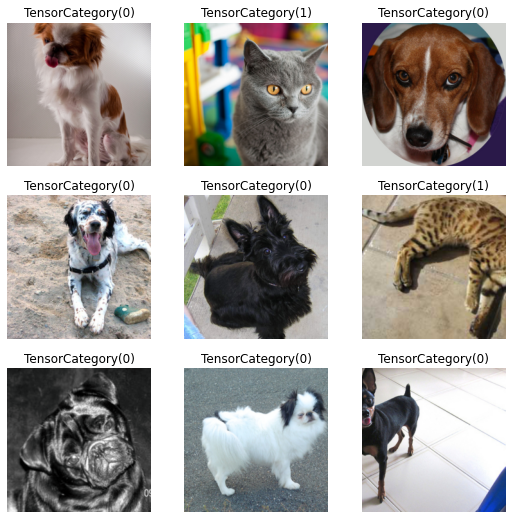

In [9]:
batch_transformed = dataloaders.train.one_batch()
batch = dataloaders.train.decode(batch_transformed)
images_orig, labels = batch
images = images_orig.clone()

show_image_batch((images, labels))

In [10]:
images.shape

torch.Size([64, 3, 224, 224])

The first value is the batch size, the second value appears to be the number of color channels (3), and the third and fourth values are the width and height of the images (224 x 224 pixels).

<AxesSubplot:>

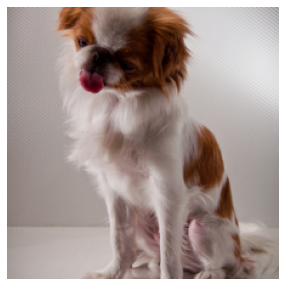

In [11]:
show_image(images[0])

<AxesSubplot:>

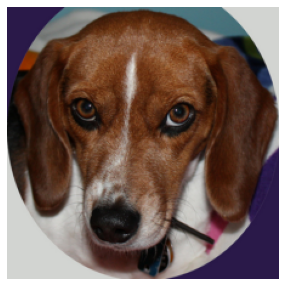

In [20]:
# Show third image in batch
show_image(images[2])

<AxesSubplot:>

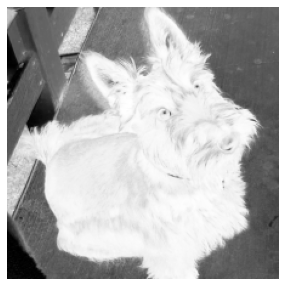

In [19]:
# Show the 5th image's blue channel
show_image(images[4, 2])

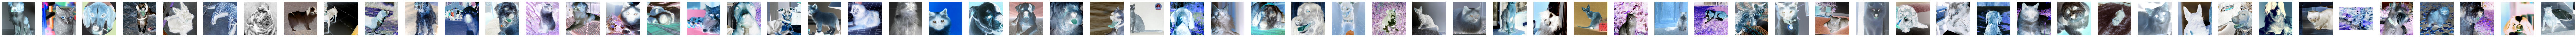

In [33]:
show_images(255 - images)

The above code appears to create negatives of each image in the batch, inverting the colors.